<a href="https://colab.research.google.com/github/ptnv-s/MRM-IECSE-Introduction_to_Neural_Networks/blob/main/DAY_1_DNN_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MRM-IECSE Workshop
## Introduction to DL and CNNs using Tensorflow
### Day-1 


## Basics of Neural Network using Tensorflow

###Importing all important libraries to be used in this tutorial

In this Tutorial we will be using Tensorflow. 

TensorFlow is an open source library for numerical computation and large-scale machine learning. TensorFlow bundles together a slew of machine learning and deep learning models and algorithms and makes them useful by way of a common metaphor. It uses Python to provide a convenient front-end API for building applications with the framework, while executing those applications in high-performance C++.

In [1]:
import tensorflow as tf

Along with tensorflow we will be using other helper libraries to do other operations/tasks in-order to solve our problem.



*   Numpy is used for mathematical operation related to an array
*   Matplotlib is used for drawing graphs for representing data



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers,models

###Downloading and Loading the dataset from keras library
We will be downloading dataset directly from the keras repository using keras dataset for this tutorial. 

We are dividing the dataset into training set and test set

Training Set - Used for Training and Evaluation of our model

Test Set - Used only for final testing of model's accuracy

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In a grayscale image the intensity value varies from 0 to 255.

But we normalize it between 0 and 1 because it helps the network in learning faster during gradient descent .

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train.shape

(60000, 28, 28)

Here we reshape the dataset so that we can use it with tf model

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

###Building the Neural Network model

*   Building the neural network requires configuring the layers of the model, then compiling the model.
*   The basic building block of a neural network is the layer.
*   Layers extract representations from the data fed into them.
*   Most of deep learning in Neural Networks consists of chaining together simple layers. 

Basic Terminology

```
model = tf.keras.Sequential([____])
```

*   This command is used for defining a Sequential Model in tf.
*   A Sequential Model is a DL model having stack of layers where each layer has exactly one input vector and one output vector.

```
tf.keras.layers.Flatten(input_shape=(28, 28))
```

*   The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
*   Think of this layer as unstacking rows of pixels in the image and lining them up as a 1-D vector.
*   This layer has no parameters to learn it is used only for reformating the data.

```
tf.keras.layers.Dense(128, activation='____')
```

*   After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
*   These are densely connected, or fully connected neural layers basically hidden and output layers which we use in neural network.
*   It can have an activation function if required.
*   We can define no of neurons in a layer using this.

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(10)
])

####Compile the model





```
model.compile()
```

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step.

```
model.compile(optimizer='___')
```

Optimizer —This is how the model is updated based on the data it sees and its loss function. Egs- Gradient Descent , Stochastic Gradient Descent and more.



```
model.compile(loss='___')
```

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
For our task which is classification we use cross entropy loss function.


```
model.compile(metrics=['____'])
```
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [10]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We use the following command to visualize our model.

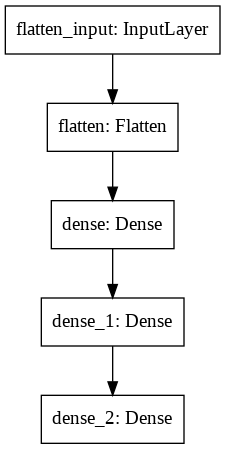

In [11]:
tf.keras.utils.plot_model(model)

###Training the model

Training the neural network model requires the following steps:


1.   Feed the training data to the model.
2.   The model learns to associate images and labels.
3.   You ask the model to make predictions about a test set.
4.   Verify that the predictions match the labels from the test_labels array.


Feed the model


```
model.fit(X_train, y_train, epochs=___)
```

To start training, call the model.fit method—so called because it "fits" the model to the training data.

X_train = training data

y_train = labels of training data

epochs = no of times training cycle runs


As the model trains, the loss and accuracy metrics are displayed.

In [12]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6191 - accuracy: 0.8443
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2992 - accuracy: 0.9170
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9308
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9405
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1810 - accuracy: 0.9478
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1607 - accuracy: 0.9537
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1448 - accuracy: 0.9588
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1319 - accuracy: 0.9619
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9650
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.111

####Evaluate accuracy

```
model.evaluate(X_test,y_test)
```

Next, compare how the model performs on the test dataset.

In [13]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0859 - accuracy: 0.9731

Test accuracy: 0.9731000065803528


####Make predictions

With the model trained, you can use it to make predictions about some images. 

```
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
```

The model's linear outputs, logits.

We attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [14]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(X_test)

Here, the model has predicted the label for a image in the testing set.

In [16]:
predictions[0]

array([5.4433481e-06, 3.6108559e-05, 3.0565969e-04, 7.7682425e-04,
       1.7638551e-07, 2.2220291e-05, 2.9876364e-08, 9.9875379e-01,
       4.0542000e-05, 5.9125290e-05], dtype=float32)

A prediction is an array of 10 numbers. 

They represent the model's "confidence" that the image corresponds to each of the 10 different digits of number. 

You can see which label has the highest confidence value:

**Actual label**

In [17]:
y_test[0]

7

**Predicted Value**

In [18]:
np.argmax(predictions[0])

7

In [19]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

####Lets see some more predictions made by model

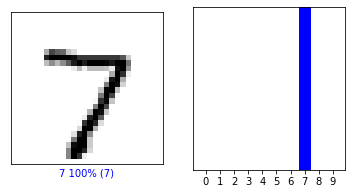

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

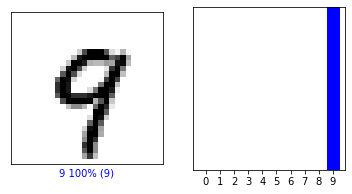

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],  y_test, X_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

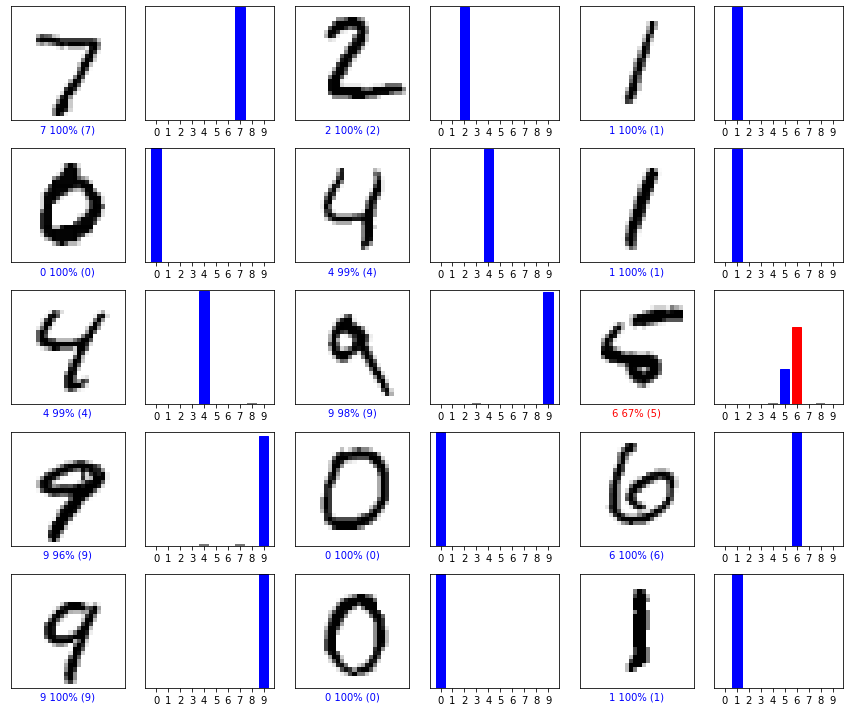

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()